In [1]:
import pandas as pd

In [8]:
data = pd.read_csv("Pokemon.csv",index_col=0)

In [9]:
data

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True


In [10]:
data.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [15]:
print(data.isnull().sum())

Name          0
Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64


In [13]:
data['Type 2'].fillna('None', inplace=True)


In [14]:
data.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,None,309,39,52,43,60,50,65,1,False


In [16]:
from sklearn.preprocessing import LabelEncoder

In [18]:
label_encoder = LabelEncoder()
data['Type 1'] = label_encoder.fit_transform(data['Type 1'])
data['Type 2'] = label_encoder.fit_transform(data['Type 2'])

In [19]:
data.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,9,14,318,45,49,49,65,65,45,1,False
2,Ivysaur,9,14,405,60,62,63,80,80,60,1,False
3,Venusaur,9,14,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,9,14,625,80,100,123,122,120,80,1,False
4,Charmander,6,12,309,39,52,43,60,50,65,1,False


In [22]:
X = data.drop(columns=['Name', 'Legendary'])
y = data['Legendary']

In [23]:
X

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
#,,,,,,,,,,
1,9,14,318,45,49,49,65,65,45,1
2,9,14,405,60,62,63,80,80,60,1
3,9,14,525,80,82,83,100,100,80,1
3,9,14,625,80,100,123,122,120,80,1
4,6,12,309,39,52,43,60,50,65,1
...,...,...,...,...,...,...,...,...,...,...
719,15,4,600,50,100,150,100,150,50,6
719,15,4,700,50,160,110,160,110,110,6
720,14,8,600,80,110,60,150,130,70,6


In [24]:
y

#
1      False
2      False
3      False
3      False
4      False
       ...  
719     True
719     True
720     True
720     True
721     True
Name: Legendary, Length: 800, dtype: bool

In [25]:
y = y.astype(int)

In [26]:
y

#
1      0
2      0
3      0
3      0
4      0
      ..
719    1
719    1
720    1
720    1
721    1
Name: Legendary, Length: 800, dtype: int32

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [41]:
clf = DecisionTreeClassifier(random_state=1)

In [42]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

In [43]:
y_pred = clf.predict(X_test)

In [44]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.925
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       219
           1       0.57      0.57      0.57        21

    accuracy                           0.93       240
   macro avg       0.77      0.77      0.77       240
weighted avg       0.93      0.93      0.93       240

Confusion Matrix:
[[210   9]
 [  9  12]]


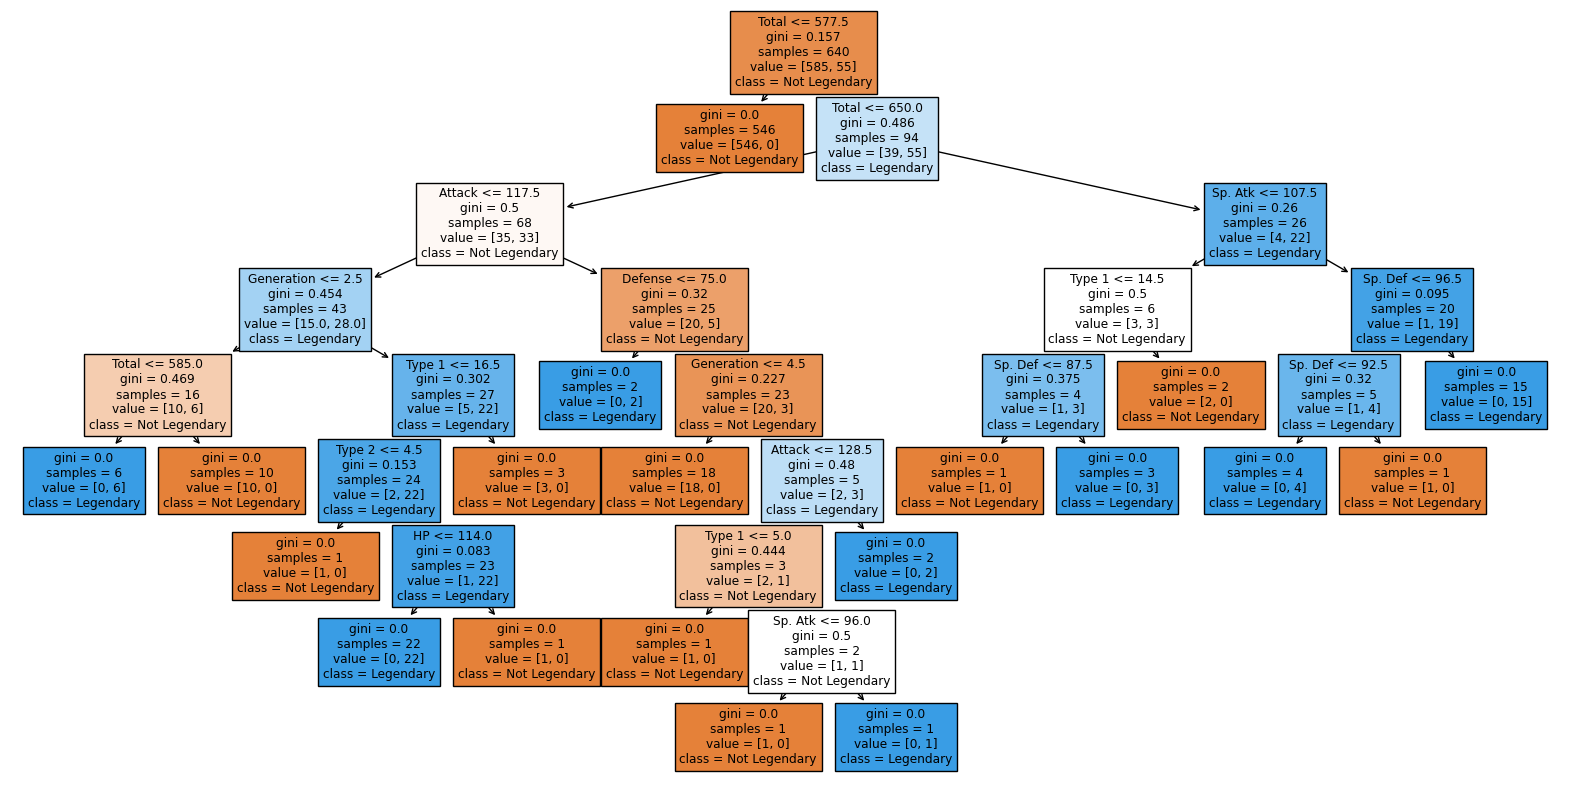

In [35]:
# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=['Not Legendary', 'Legendary'], filled=True)
plt.show()

In [36]:
gen_5_pokemons = data[data['Generation'] == 5]

# Count the number of Pokémon from the 5th generation
num_gen_5_pokemons = gen_5_pokemons.shape[0]

print(f'Number of Pokémon from the 5th generation: {num_gen_5_pokemons}')

Number of Pokémon from the 5th generation: 165


In [38]:
max_defense_score = data['Defense'].max()

# Count the number of Pokémon with the maximum defense score
num_pokemon_max_defense = data[data['Defense'] == max_defense_score].shape[0]

print(f'Number of Pokémon with the highest defense score: {num_pokemon_max_defense}')

Number of Pokémon with the highest defense score: 3


In [47]:
precision_false = precision_score(y_test, y_pred, pos_label=0)

print(f'Precision of the Decision Tree model when the target is False: {precision_false}')

Precision of the Decision Tree model when the target is False: 0.958904109589041


In [51]:
sensitivity_true = recall_score(y_test, y_pred, pos_label=1)

print(f'Sensitivity of the Decision Tree model when the target is True: {sensitivity_true}')

Sensitivity of the Decision Tree model when the target is True: 0.5714285714285714


In [52]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate the number of misclassified data points
misclassified_data = conf_matrix[0, 1] + conf_matrix[1, 0]

print(f'Number of misclassified data points: {misclassified_data}')

Number of misclassified data points: 18


In [53]:
import pandas as pd
import numpy as np

# Load data
data1 = pd.read_csv('diabetes.csv')

In [54]:
data1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [57]:
# Convert Blood Pressure to categorical
def categorize_bp(bp):
    if bp < 80:
        return 'Low Pressure'
    elif 80 <= bp <= 120:
        return 'Normal'
    else:
        return 'High Pressure'

data1['BP_Category'] = data1['BloodPressure'].apply(categorize_bp)

In [61]:
from scipy.stats import entropy

# Calculate frequencies
bp_counts = data1['BP_Category'].value_counts()
probabilities = bp_counts / bp_counts.sum()

# Compute entropy
bp_entropy = entropy(probabilities)
print(f"Entropy of BP Category: {bp_entropy}")


Entropy of BP Category: 0.5884083407168573


In [60]:
data1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BP_Category
0,6,148,72,35,0,33.6,0.627,50,1,Low Pressure
1,1,85,66,29,0,26.6,0.351,31,0,Low Pressure
2,8,183,64,0,0,23.3,0.672,32,1,Low Pressure
3,1,89,66,23,94,28.1,0.167,21,0,Low Pressure
4,0,137,40,35,168,43.1,2.288,33,1,Low Pressure


In [68]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score

# Independent features and target
X = data1[['Pregnancies', 'BloodPressure']]
y = data1['Outcome']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

# Fit the model
model = RandomForestClassifier(random_state=8)
model.fit(X_train, y_train)

# Predict and calculate confusion matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)


In [69]:
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision}")


Precision: 0.3958333333333333


In [70]:
from sklearn.metrics import recall_score

recall = recall_score(y_test, y_pred)
print(f"Recall: {recall}")


Recall: 0.3392857142857143
